<a href="https://colab.research.google.com/github/masher5764/Rainfall-Prediction-RandomForest-/blob/main/RainFall_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
data = pd.read_csv('/content/train_rain.csv')

In [3]:
data.head(10)

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87,88,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95,91,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75,47,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95,95,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52,45,3.6,40.0,24.8,0
5,5,6,1022.7,20.6,18.6,16.5,12.5,79,81,0.0,20.0,15.7,1
6,6,7,1022.8,19.5,18.4,15.3,11.3,56,46,7.6,20.0,28.4,0
7,7,8,1019.7,15.8,13.6,12.7,11.8,96,100,0.0,50.0,52.8,1
8,8,9,1017.4,17.6,16.5,15.6,12.5,86,100,0.0,50.0,37.5,1
9,9,10,1025.4,16.5,14.4,12.0,8.6,77,84,1.0,50.0,38.3,0


In [4]:
data.columns

Index(['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp',
       'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection',
       'windspeed', 'rainfall'],
      dtype='object')

In [5]:
data = data.drop(columns=["day"])
data = data.drop(columns=["id"])

In [6]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,1017.4,21.2,20.6,19.9,19.4,87,88,1.1,60.0,17.2,1
1,1019.5,16.2,16.9,15.8,15.4,95,91,0.0,50.0,21.9,1
2,1024.1,19.4,16.1,14.6,9.3,75,47,8.3,70.0,18.1,1
3,1013.4,18.1,17.8,16.9,16.8,95,95,0.0,60.0,35.6,1
4,1021.8,21.3,18.4,15.2,9.6,52,45,3.6,40.0,24.8,0


In [7]:
print(data.isnull().sum())

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64


In [8]:
data.shape

(1825, 11)

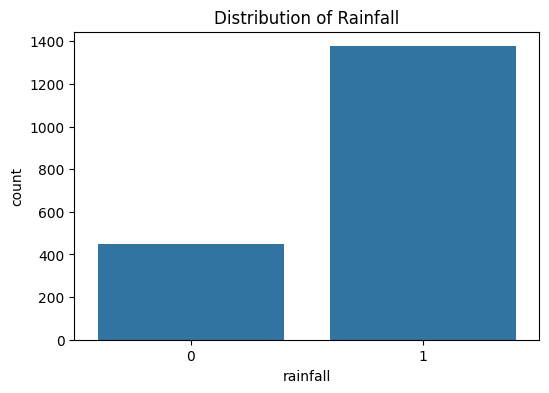

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x="rainfall", data=data)
plt.title("Distribution of Rainfall")data = data.drop(columns=['maxtemp', 'temparature', 'mintemp'])
plt.show()

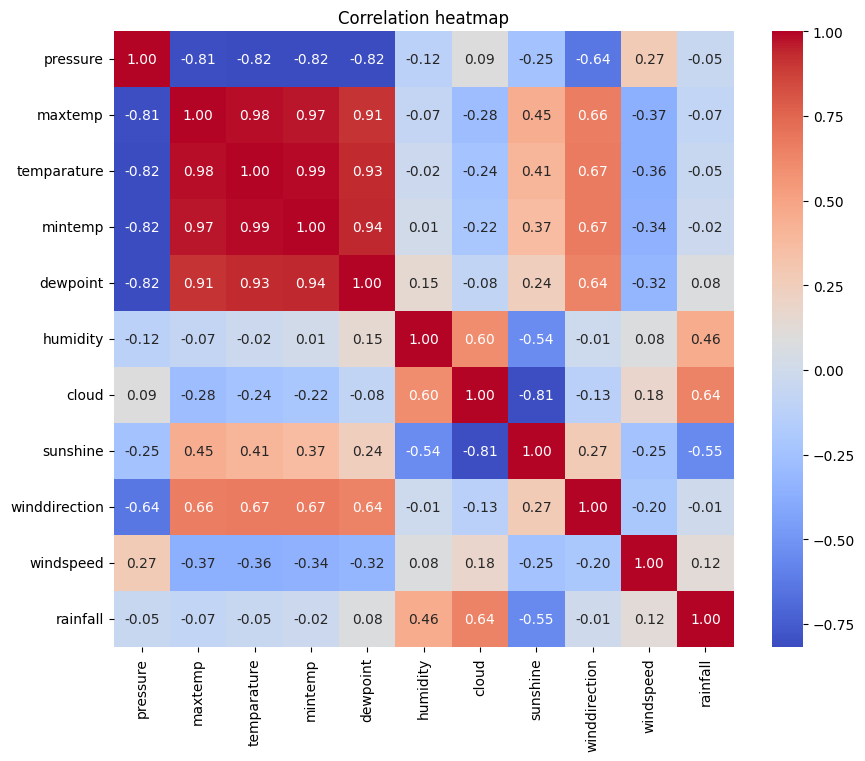

In [10]:
# correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

In [11]:
data = data.drop(columns=['maxtemp', 'temparature', 'mintemp'])

In [12]:
print(data["rainfall"].value_counts())

rainfall
1    1376
0     449
Name: count, dtype: int64


In [13]:
df_majority = data[data["rainfall"] == 1]
df_minority = data[data["rainfall"] == 0]

In [14]:
print(df_majority.shape)
print(df_minority.shape)

(1376, 8)
(449, 8)


In [17]:
# downsample majority class to match minority count
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

In [18]:
df_majority_downsampled.shape

(449, 8)

In [19]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [20]:
df_downsampled.shape

(898, 8)

In [21]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
682,1017.5,17.2,93,93,0.4,70.0,21.9,1
89,1010.1,21.6,91,88,0.3,50.0,19.6,1
1144,1017.8,15.5,86,79,0.1,60.0,12.5,1
855,1006.6,25.1,77,69,7.6,220.0,9.1,1
320,1017.5,18.6,75,44,6.7,60.0,28.9,1


In [22]:
df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [23]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,1009.5,24.7,83,88,3.5,180.0,16.9,1
1,1021.6,11.1,67,91,0.0,20.0,59.5,0
2,1008.4,25.8,87,84,3.7,230.0,18.8,1
3,1007.8,25.8,79,48,10.0,220.0,10.0,0
4,1008.4,25.4,89,88,1.1,230.0,39.7,1


In [24]:
df_downsampled["rainfall"].value_counts()

,count
rainfall,
1,449
0,449


In [25]:
X = df_downsampled.drop(columns=["rainfall"])
y = df_downsampled["rainfall"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
rf_model = RandomForestClassifier(random_state=42)

param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_features": ["sqrt", "log2"],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [34]:
# Hypertuning using GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)

grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [39]:
# test set performance
best_rf_model = grid_search_rf.best_estimator_
y_pred = best_rf_model.predict(X_test)

print("Test set Accuracy:", accuracy_score(y_test, y_pred))
print("Test set Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test set Accuracy: 0.8666666666666667
Test set Confusion Matrix:
 [[75 15]
 [ 9 81]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86        90
           1       0.84      0.90      0.87        90

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180



In [40]:
test_data = pd.read_csv('/content/rain_test.csv')

In [41]:
test_data.columns

Index(['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp',
       'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [43]:
test_data.drop(columns=["day"], inplace=True)
test_data.drop(columns=["id"], inplace=True)

In [50]:
X_test = test_data

In [46]:
X_test.size

7300

In [51]:
X_test["winddirection"].fillna(X_test["winddirection"].median(), inplace=True)

<ipython-input-51-3368ea52119f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test["winddirection"].fillna(X_test["winddirection"].median(), inplace=True)


In [53]:
X_test = X_test.drop(columns=['maxtemp', 'temparature', 'mintemp'])

In [54]:
test_predictions = best_rf_model.predict(X_test)

In [55]:
# Save predictions
predictions_file = "rain_test_predictions.csv"
np.savetxt(predictions_file, test_predictions, delimiter=",", fmt="%d")

print(f"Predictions saved to {predictions_file}")

Predictions saved to rain_test_predictions.csv
